<a href="https://colab.research.google.com/github/AnanyaSDhar/Fake-News-Detection/blob/main/Student_score_pred_(Linear_Regression%2C_SVM_and_Random_Forest_Regressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
dfStudents = pd.read_csv('/content/student-mat.csv', sep=";")
dfStudents.dataframeName = 'StudentsPerformance.csv'

In [31]:
rows, cols = dfStudents.shape
print(f'{rows} observaciones y {cols} características')

395 observaciones y 33 características


school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [33]:
dfStudents.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [34]:
for col in dfStudents.columns:
    print(col)

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [45]:
dfStudents.drop(['Dalc','Walc','romantic'], axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,4,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,5,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,4,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,4,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,5,5,4,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,2,4,5,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,5,5,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,4,4,1,5,0,11,12,10


In [48]:
for col in dfStudents.columns:
    print(col)

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [46]:
outcomes = dfStudents['G3']
features_raw = dfStudents.drop(['G3','G2','G1'],axis=1)

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cf37e9580>,
      dtype=object)

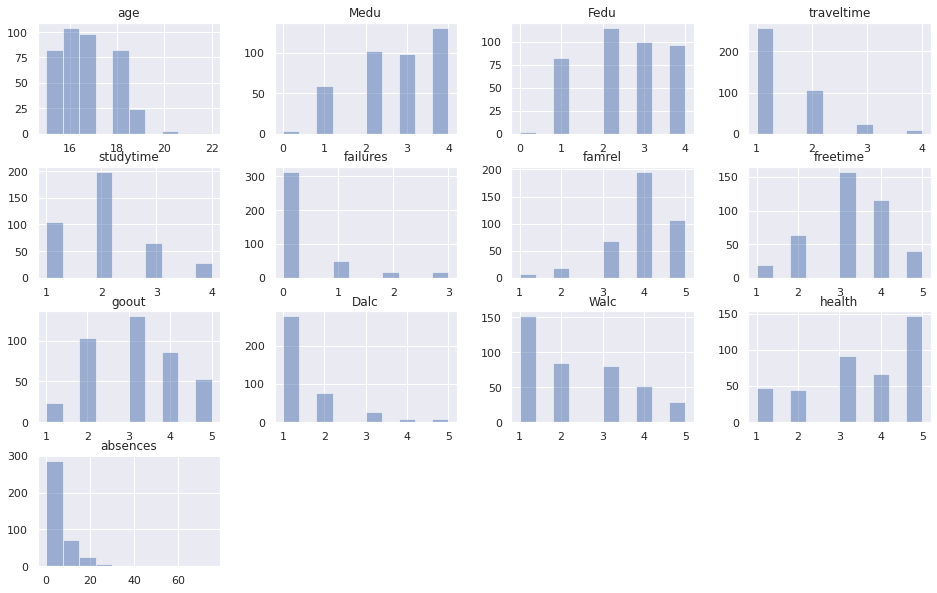

In [47]:
features_raw.hist(alpha=0.5, figsize=(16, 10))

In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Cantidad de observaciones')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (columna {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

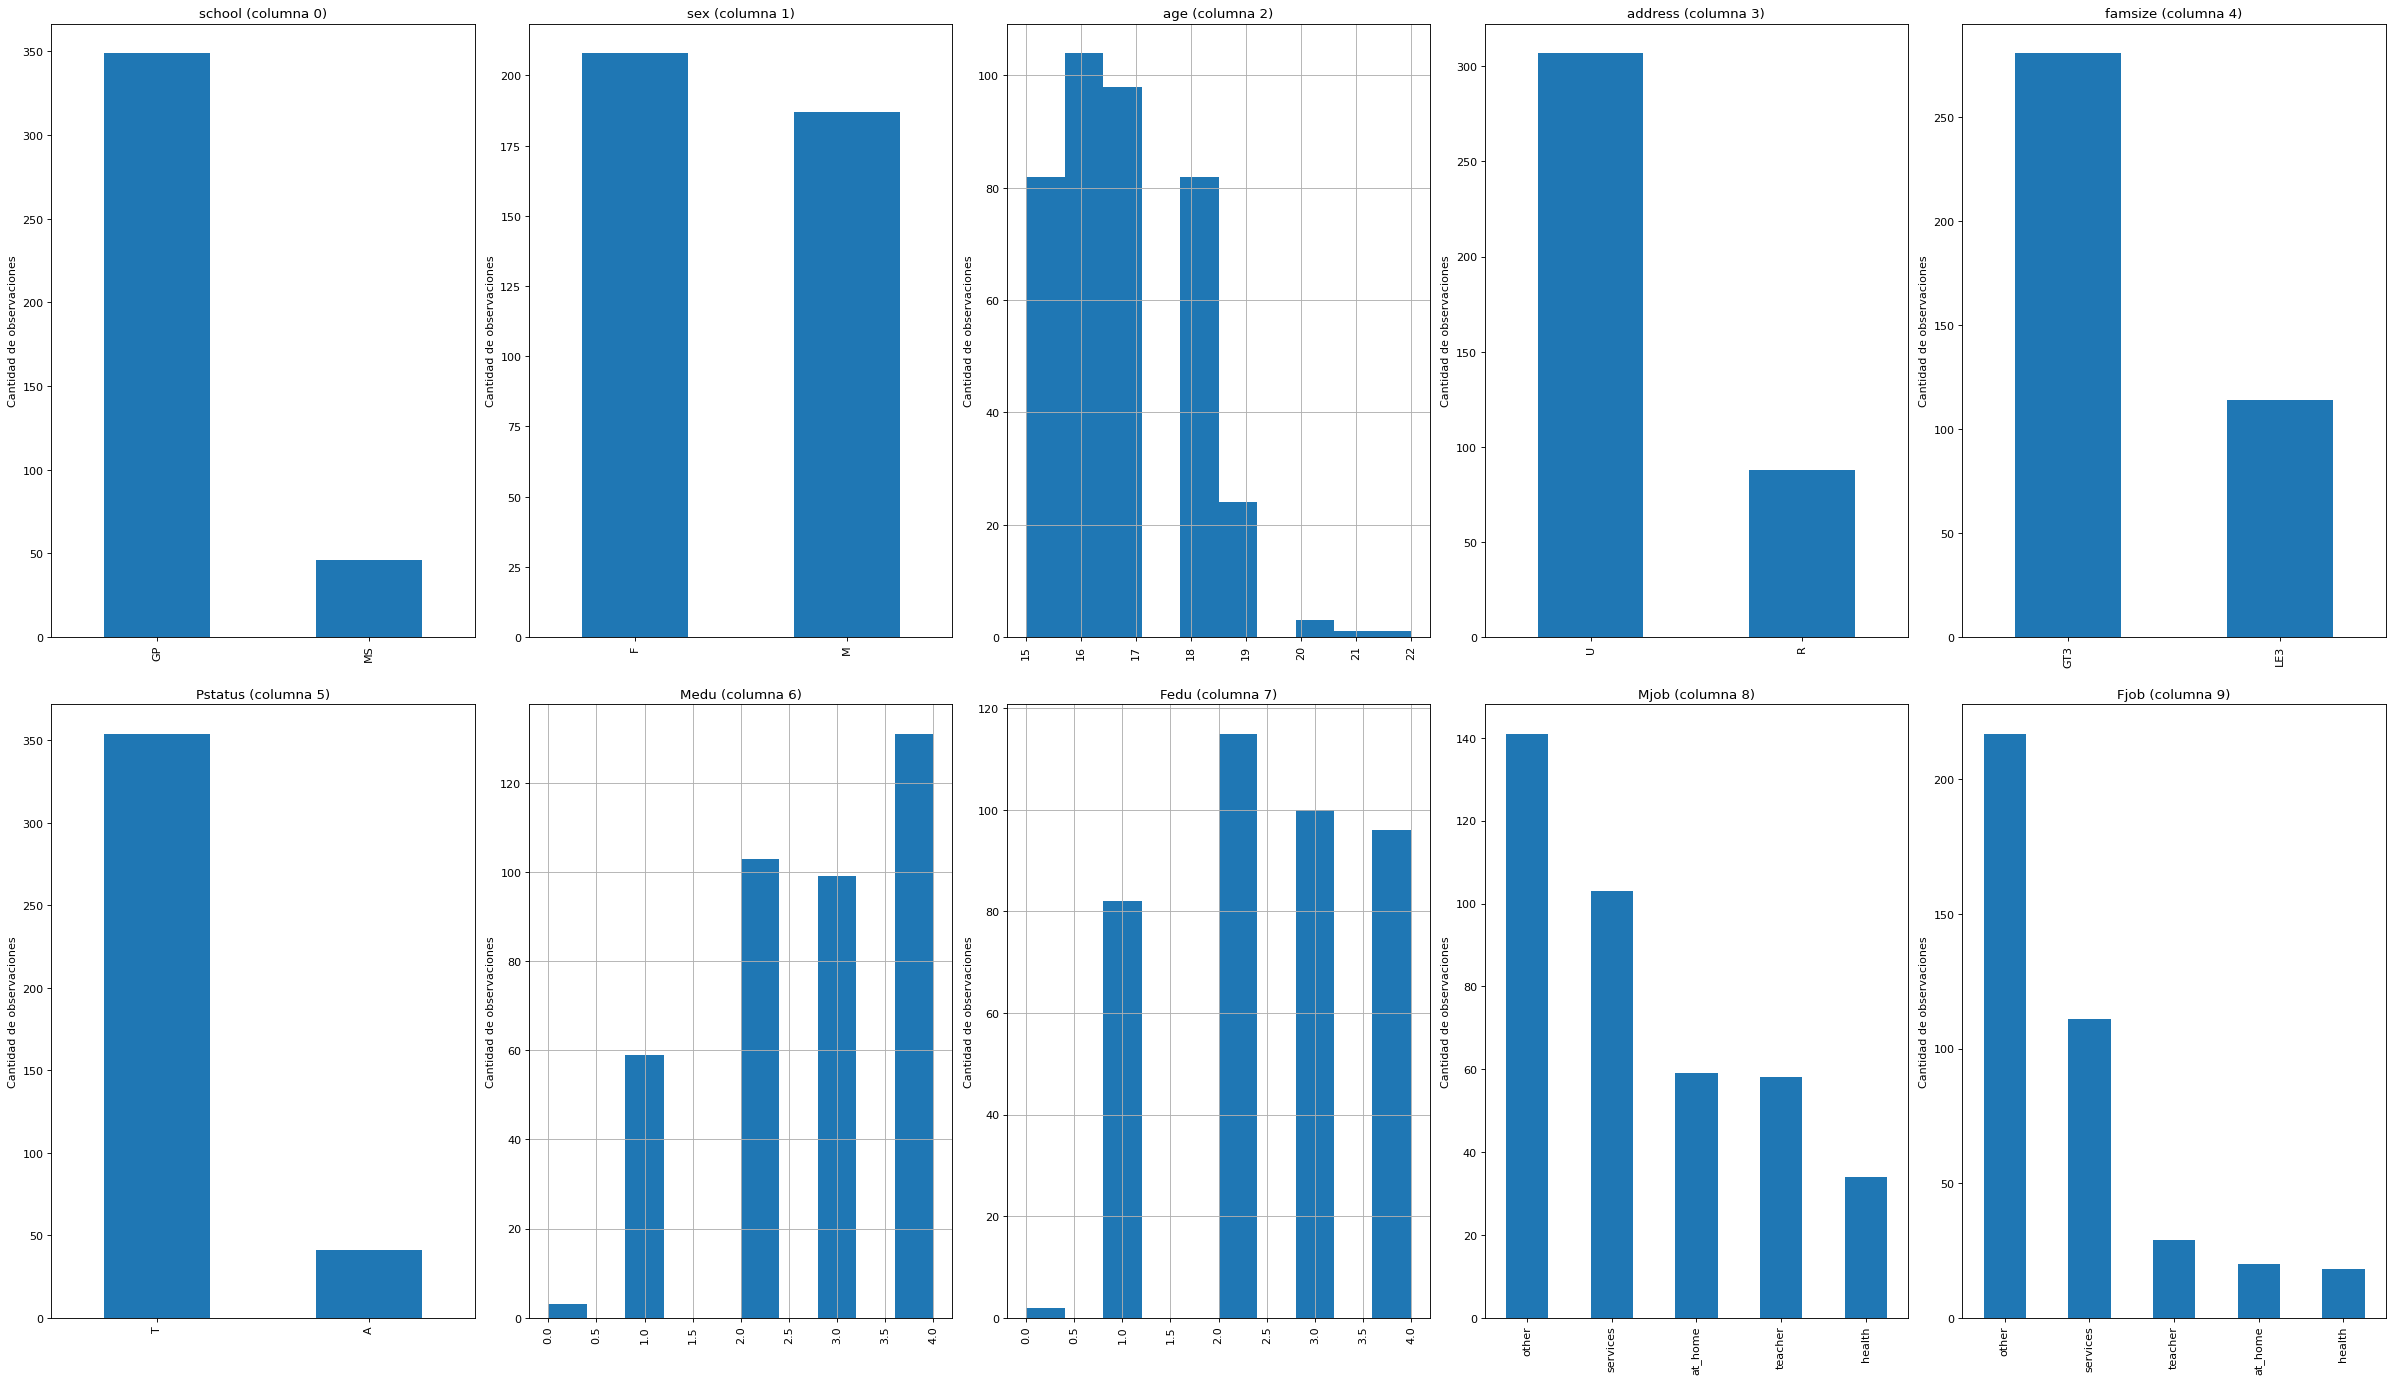

In [12]:
plotPerColumnDistribution(dfStudents, 10, 5)

In [13]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

<ipython-input-13-893604adda35>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


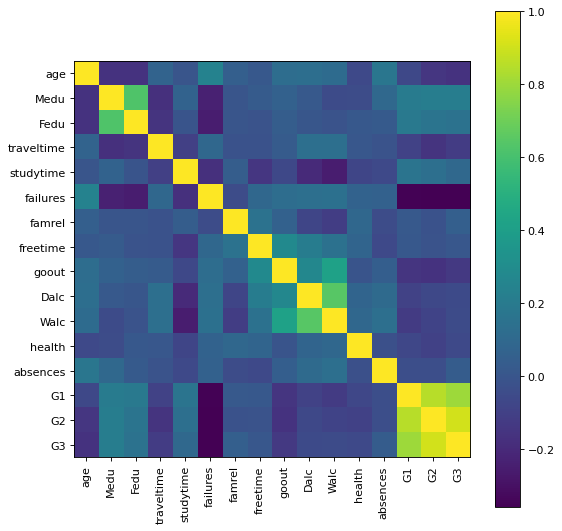

In [14]:
plotCorrelationMatrix(dfStudents, 8)

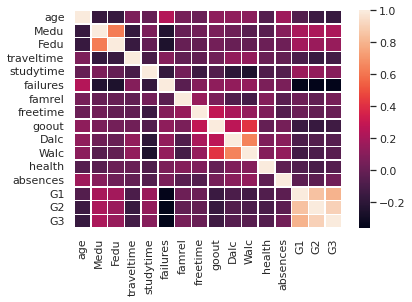

In [38]:
import seaborn as sns
sns.set()
sns.heatmap(dfStudents.corr(),linewidths=.5)

high correlations between the final grades and the grades given in first and second perion

# Data Pre-Processing

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
features_log_minmax_transform = pd.DataFrame(data=features_raw)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

display(features_log_minmax_transform.head(n=5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,0.428571,U,GT3,A,1.00,1.00,at_home,teacher,...,yes,no,no,0.75,0.50,0.75,0.00,0.00,0.5,0.080000
1,GP,F,0.285714,U,GT3,T,0.25,0.25,at_home,other,...,yes,yes,no,1.00,0.50,0.50,0.00,0.00,0.5,0.053333
2,GP,F,0.000000,U,LE3,T,0.25,0.25,at_home,other,...,yes,yes,no,0.75,0.50,0.25,0.25,0.50,0.5,0.133333
3,GP,F,0.000000,U,GT3,T,1.00,0.50,health,services,...,yes,yes,yes,0.50,0.25,0.25,0.00,0.00,1.0,0.026667
4,GP,F,0.142857,U,GT3,T,0.75,0.75,other,other,...,yes,no,no,0.75,0.50,0.25,0.00,0.25,1.0,0.053333


This will ensure that each feature is treated equally when performing supervised learning algortihms on the data.

One Hot Encoding: Using Pandas encode non numerical values to numerical values

In [51]:
features_final = pd.get_dummies(features_log_minmax_transform)
encoded = list(features_final.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print(encoded)

56 total features after one-hot encoding
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


# Training the model


Train-test split


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_final,outcomes, test_size = 0.2, random_state=42)

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 316 samples
Testing set has 79 samples


**Linear** **Regression**

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

train_rms = sqrt(mean_squared_error(y_train, y_train_pred))
test_rms = sqrt(mean_squared_error(y_test, y_test_pred))

print("The Root mean Squared Error for the training set is:  ", train_rms)
print("The Root mean Squared Error for the testing set is:   ", test_rms)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error for Training Set:   %f' % mae_train)
print('Mean Absolute Error for Testing Set:   %f' % mae_test)

print("Cross val score for training set:  ",cross_val_score(model, X_train, y_train, cv=5).mean())
print("Cross val score for testing set:  ",cross_val_score(model, X_test, y_test, cv=5).mean())

The Root mean Squared Error for the training set is:   3.8949440815927225
The Root mean Squared Error for the testing set is:    4.243596255207979
Mean Absolute Error for Training Set:   2.942247
Mean Absolute Error for Testing Set:   3.435127
Cross val score for training set:   -0.09503185750583401
Cross val score for testing set:   -1.4969165201049166


The result shows margin of Error of about 10-40%


In [59]:
def model_Creator_Tester(name,model,X_train,X_test,y_train,y_test):
    print(name)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error

    train_rms = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rms = sqrt(mean_squared_error(y_test, y_test_pred))
    print("The Root mean Squared Error for the training set is", train_rms)
    print("The Root mean Squared Error for the testing set is ", test_rms)


    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print('Mean Absolute Error for Training Set: %f' % mae_train)
    print('Mean Absolute Error for Testing Set: %f' % mae_test)
    return train_rms,test_rms,mae_train,mae_test;

Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
Random_forest_regressor = RandomForestRegressor(n_estimators=10,random_state=0)
Random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [65]:
Random_forest_regressor.score(X_test, y_test)

0.31758697215015785

In [67]:
from sklearn.svm import SVC
names = ["Linear_Regression","SVM","Random Forest Regressor"]
models = [LinearRegression(),SVC(gamma='auto'),RandomForestRegressor(n_estimators=10,random_state=0)]
results = {}
for x,y in zip(names,models):
    print("\n",y,"\n")
    results[x]=model_Creator_Tester(x,y,X_train,X_test,y_train,y_test)


 LinearRegression() 

Linear_Regression
The Root mean Squared Error for the training set is 3.8949440815927225
The Root mean Squared Error for the testing set is  4.243596255207979
Mean Absolute Error for Training Set: 2.942247
Mean Absolute Error for Testing Set: 3.435127

 SVC(gamma='auto') 

SVM
The Root mean Squared Error for the training set is 4.762059973359578
The Root mean Squared Error for the testing set is  5.044109235007063
Mean Absolute Error for Training Set: 3.322785
Mean Absolute Error for Testing Set: 4.075949

 RandomForestRegressor(n_estimators=10, random_state=0) 

Random Forest Regressor
The Root mean Squared Error for the training set is 1.7681965352702658
The Root mean Squared Error for the testing set is  3.740710011803249
Mean Absolute Error for Training Set: 1.249367
Mean Absolute Error for Testing Set: 3.055696


In [68]:
def color_gradient ( val, beg_rgb, end_rgb, val_min = 0, val_max = 1):
    val_scale = (1.0 * val - val_min) / (val_max - val_min)
    return ( beg_rgb[0] + val_scale * (end_rgb[0] - beg_rgb[0]),
             beg_rgb[1] + val_scale * (end_rgb[1] - beg_rgb[1]),
             beg_rgb[2] + val_scale * (end_rgb[2] - beg_rgb[2]))

In [69]:
def print_results(results):
    titles = ["Root Mean Square for Training Set","Root Mean Square for Testing Set","Mean Absolute Error for Training Set","Mean Absolute Error for Testing Set"]
    fig = plt.figure(figsize=(10, 10))
    plt.rcParams.update({'font.size': 10})
    grad_beg, grad_end = ( 0.1, 0.1, 0.1), (1, 1, 0)
    for i,k in enumerate(results):
        tempVals = []
        for j in results.keys():
            #print(i,j)
            #print(results[j][i])
            tempVals.append(results[j][i])
        print(tempVals)
        print(results.keys())
        plt.subplot(len(titles)/2.,len(titles)/2.,1+i)
        col_list = [ color_gradient( val,
                                 grad_beg,
                                 grad_end,
                                 min( tempVals),
                                 max(tempVals)) for val in tempVals]

        plt.bar(results.keys(),tempVals,color = col_list)
        plt.title(titles[i])

[3.8949440815927225, 4.762059973359578, 1.7681965352702658]
dict_keys(['Linear_Regression', 'SVM', 'Random Forest Regressor'])
[4.243596255207979, 5.044109235007063, 3.740710011803249]
dict_keys(['Linear_Regression', 'SVM', 'Random Forest Regressor'])
[2.9422468354430378, 3.3227848101265822, 1.249367088607595]
dict_keys(['Linear_Regression', 'SVM', 'Random Forest Regressor'])


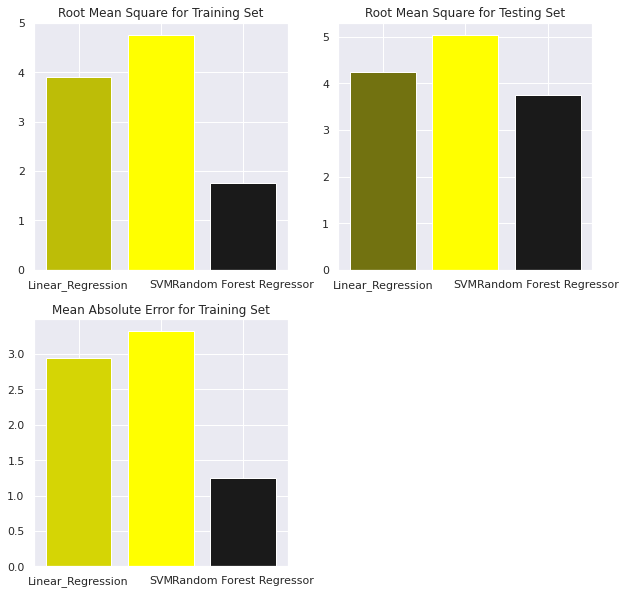

In [70]:
print_results(results)